<a href="https://colab.research.google.com/github/Yashwanth1531/Bessel-Function/blob/main/BesselODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.special as s
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
import cmath
from mpl_toolkits.mplot3d import Axes3D
#import slider package

#from google.colab import drive
#drive.mount('drive')

In [ ]:
#@title Variables and Parameters

#Values for r_0(radius of motor housing/shaft), heat generated(q) were taken for a motor problem

bi      = 3                      #Biot Number
kappa   = 52                     #Thermal Conductivity(cast iron housing)
alp     = 1.7025e-5              #Thermal Diffusivity

r_0     = 0.2                    #Max radius

q       = 7e4                   #Heat generated/vol
Ti      = 30                    #Initial temp
Tinf    = 25                    #Ambient temp
delT    = Ti-Tinf

k_val   =  32                  #Bessel summation terms
step    = 0.0001                    #Radius steps


#b=complex(0,1)
#print(b)

In [ ]:
#@title Bessel Fun zeroth & first order: (Jo,J1)
def J0(x2):
  bsf1=s.jv(0,x2)
  return(bsf1)

def J1(x3):
  bsf2=s.jv(1,x3)
  return(bsf2)

In [ ]:
#@title Eigen Values for different Bi


# sflam = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Math Codes/Copy of Sorted_Filtered.csv')  
# # slam  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Math Codes/Copy of Sorted.csv')

# # lam = (slam.to_numpy())/r_0

# lam = (sflam.to_numpy())/r_0
# print(type(lam))




##Bi=1##lam = np.array([1.2557837117946,4.0794777108393,7.1557991746440,10.2709853620793,13.3983974864138,16.5311589326050,19.6667277887128,22.8039505186316,25.9422288398533,29.0812217718691,32.2207208280665,35.3605913932645,38.5007426824640,41.6411112516383,44.7816514290601,47.9223295014823,51.0631200414536,54.2040035097965,57.3449646447644,60.4859913524936,63.6270739257397,66.7682044829213,69.9093765582564,73.0505847975588,76.1918247292276,79.3330925896073,82.4743851882334,85.6156998027256,88.7570340959897,91.8983860503923,95.0397539149845,98.1811361628517,101.3225314563960])/r_0




 
##Bi=3##
lam=np.array([1.7886571741034556,4.463371687062525,7.4102697979339265,10.456598813134065,13.543437687744268,16.64985349628233,19.76705067826938,22.890769808457094,26.018720007267877,29.149565359078395,32.282476442581064,35.4169119388982,38.55250391155869,41.68899371534701,44.8261943125047,47.96396714328303, 51.10220740390041, 54.24083572371715, 57.37978487437271, 60.51900923024971, 63.65846576441509, 66.79812391906279, 69.9379538599341, 73.0779357679667, 76.2180501858754, 79.35828141633321, 82.49861655165894, 85.63904303340324, 88.77955228353834, 91.92013548861861, 95.06078532695017, 98.2014954147345, 104.48307463211063])/r_0



##Bi=9##lam =np.array([-35.58090661205443, -4.989702929078122, 2.1566066121933813, 4.9897029300394, 7.905056881017777, 10.884181645933715, 13.909031412603078, 16.965035283739006, 20.042197057682266, 23.13399114079144, 26.23616268384973, 29.34588824710337, 32.46124870328023, 35.58090658903461, 38.703907193201005, 41.829553768393104, 44.95732749639535, 48.08683498151535, 51.217773019480305, 54.34990441005031, 57.48304118739001, 60.61703252105408, 63.75175608456559, 66.88711166918512, 70.0230164357018, 73.1594013402616, 76.29620834660287, 79.43338841419276, 82.5708997489792, 85.70870655543673, 88.84677799601506, 91.98508736123622, 95.1236114103184, 98.26232982154872])/r_0



print(lam.size)

33


In [ ]:
a=np.zeros(k_val+1)

for i in range(0,k_val+1,1):



  a[i]= (2*lam[i]*r_0)*(delT)*  (  ((bi**2+(lam[i]*r_0)**2)*(J0(lam[i]*r_0))**2)**(-1)   )  * ( (1-(q*r_0**2)*( (0.5/bi)+(1/(lam[i]*r_0))**2 )*(kappa*delT)**(-1)) *(J1(lam[i]*r_0))   +    ( ( q*r_0**2*J0(lam[i]*r_0) )*( kappa*(delT)*lam[i]*r_0)**(-1) ))






print(len(a))

33


In [ ]:
#@title Unstedy Sol Fun: (unSol)
def unSol(r,t):
  asum1=0
  asum=0
  for k in range(0,k_val+1,1):
    asum1= a[k] * (  math.exp(-(lam[k])**2   *alp*t)  )  *  J0( lam[k] * r )
    asum=asum+asum1
  return(asum)


In [ ]:
# #@title Computing Theta(r, at certain time)

# theta=np.ones(int(r_0/step)+1)
# theta1=0
# i=0
# r=0
# while(r<=r_0):
#   theta1 =  q*r_0**2*(4*kappa*delT)**(-1)*( 1-(r/r_0)**2+(2/bi) )  +  unSol(r,t)*(delT**(-1))
#   theta[i]=(theta1)
#   r=r+step
#   i=i+1

In [ ]:
# ppp=np.zeros(int(r_0/step)+1)
# lll=0
# r=0
# i=0
# while(r<=r_0):
#   lll = q*r_0**2*(4*kappa*delT)**(-1)*( 1-(r/r_0)**2+(2/bi) )
#   ppp[i]=lll
#   r=r+step
#   i=i+1

In [ ]:

# kkk=np.zeros(int(r_0/step)+1)
# jjj=0
# r=0
# i=0
# while(r<=r_0):
#   jjj = unSol(r,t)*(delT**(-1))
#   kkk[i]=jjj
#   r=r+step
#   i=i+1

In [ ]:
#theta= q*r_0*r_0*(4*kappa*delT)**(-1)*(1-(r/r_0)**2+(2/bi))  +  unSol(r,t)*(delT**(-1))

In [ ]:
radius=np.linspace(0,r_0,int(r_0/step)+1)
print(radius.size)

2001


In [ ]:
#@title Export as CSV

#data.to_csv('3Theta_r_at_50s.csv')
#!cp 3Theta_r_at_50s.csv "/content/drive/MyDrive/Colab Notebooks/Bessel"

In [ ]:
# #@title Data Frame

# data1={"Theta(r)":theta,"Steady":ppp,"Unsteady":kkk}
# data=pd.DataFrame(data1, index=radius)
# print("At given time t =",t)
# print()
# print(data)

In [ ]:
# plt.figure(figsize=(15,7))
# plt.plot(radius,ppp,label='Steady')
# plt.plot(radius,kkk,label='Unsteady')
# plt.plot(radius,theta,label='Full')
# plt.title("Unsteady & Steady v/s Radius:")
# plt.legend()
# print("Time:",t)
# plt.xlabel("Radius")
# plt.ylabel("Sols")
# plt.xlim(1,r_0)
# plt.show()

In [ ]:
# #@title Theta v/s Radius

# plt.figure(figsize=(10,5))
# plt.plot(radius,theta)
# plt.title("Theta v/s Radius:")
# print("Time:",t)
# plt.xlabel("Radius")
# plt.ylabel("Theta")
# plt.xlim(1,r_0)
# plt.show()

In [ ]:
#@title Computing for all time

tmax  = 600
tstep = 10
theta3=np.ones((int(r_0/step)+1,int(tmax/tstep)+1))
t5=0
t1=0
r1=0
while(t5<=tmax):
  r=0
  r1=0
  while(r<=r_0):
    theta3[r1,t1]= q*r_0**2*(4*kappa*delT)**(-1)*( 1-(r/r_0)**2+(2/bi) )  +  unSol(r,t5)*(delT**(-1))
    r=r+step
    r1=r1+1
  theta3[:,0]=1
  t5=t5+tstep
  t1=t1+1

print(r1,t1)
#print(theta3)

2001 61


In [ ]:

# var1=np.ones((int(r_0/step)+1,int(tmax/tstep)+1))

# t5=0
# t1=0
# r1=0
# while(t5<=tmax):
#   r=0
#   r1=0
#   while(r<=r_0):
#     for k in range(0,k_val+1,1):
#       var1[r,t5]=    (  math.exp(-(lam[k])**2   *alp*t5)  )       
#     r=r+step
#     r1=r1+1
#   t5=t5+tstep
#   t1=t1+1


# print(var1.size)

In [ ]:
# var2=np.zeros((int(r_0/step)+1))
# r=0
# r1=0
# while(r<=r_0):
#   for k in range(0,k_val+1,1):
#     var2[r]=  J0( lam[k] * r )    
#   r=r+step
#   r1=r1+1

In [ ]:
time=np.linspace(0,tmax,int(tmax/tstep)+1)
print(time.shape)

(61,)


In [ ]:
fordata=pd.DataFrame(theta3,columns=time)
print(fordata)

      0.0       10.0      20.0      30.0      40.0      50.0      60.0   \
0       1.0  2.840708  2.886545  2.932381  2.978218  3.024050  3.069851   
1       1.0  2.840708  2.886545  2.932381  2.978218  3.024050  3.069851   
2       1.0  2.840708  2.886545  2.932381  2.978218  3.024050  3.069851   
3       1.0  2.840708  2.886545  2.932381  2.978218  3.024050  3.069851   
4       1.0  2.840708  2.886545  2.932381  2.978218  3.024050  3.069851   
...     ...       ...       ...       ...       ...       ...       ...   
1996    1.0  2.310231  2.161081  2.065115  1.995186  1.941072  1.897666   
1997    1.0  2.306830  2.157886  2.062056  1.992228  1.938192  1.894849   
1998    1.0  2.303417  2.154683  2.058992  1.989265  1.935308  1.892028   
1999    1.0  2.299991  2.151473  2.055921  1.986297  1.932420  1.889204   
2000    1.0  2.296552  2.148254  2.052845  1.983324  1.929528  1.886376   

         70.0      80.0      90.0   ...     510.0     520.0     530.0  \
0     3.115545  3.160984  

BIOT NUMBER: 3


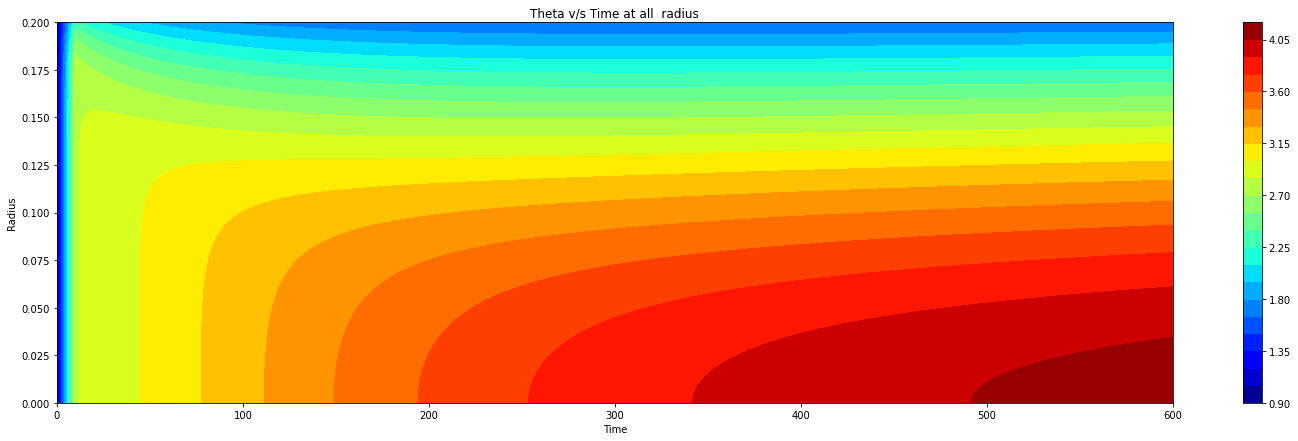

In [ ]:
#@title Theta(r) v/s Time

plt.figure(figsize=(25,7))
plt.contourf(time, radius, theta3 , 20, cmap='jet')
# plt.contourf(theta3,cmap='jet')
plt.title("Theta v/s Time at all  radius")
#plt.xlabel("Time:300s/30")
#plt.ylabel("Radius:10/0.01")
plt.ylabel("Radius")
plt.xlabel("Time")
# plt.ylim(0,101)
plt.xlim(0,600)
print("BIOT NUMBER:", bi)
plt.colorbar()
plt.show()

BIOT NUMBER: 3


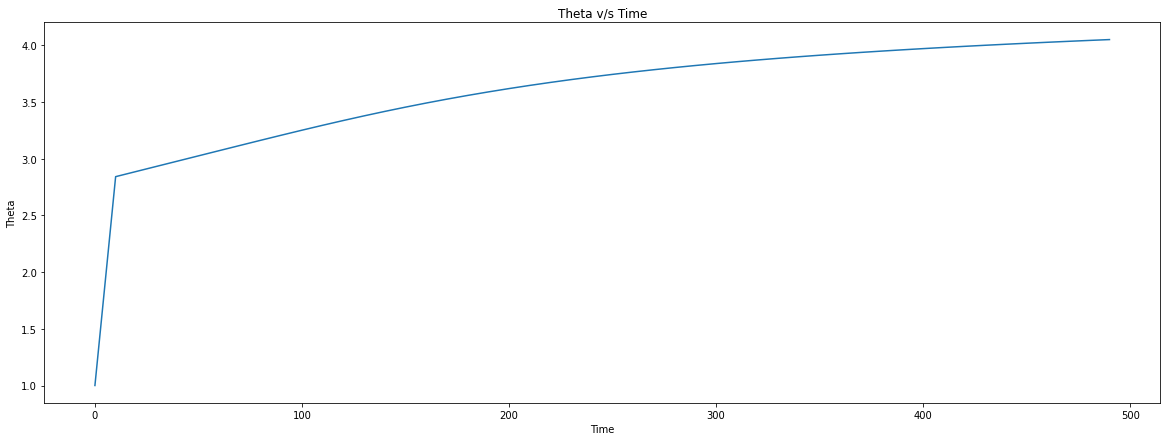

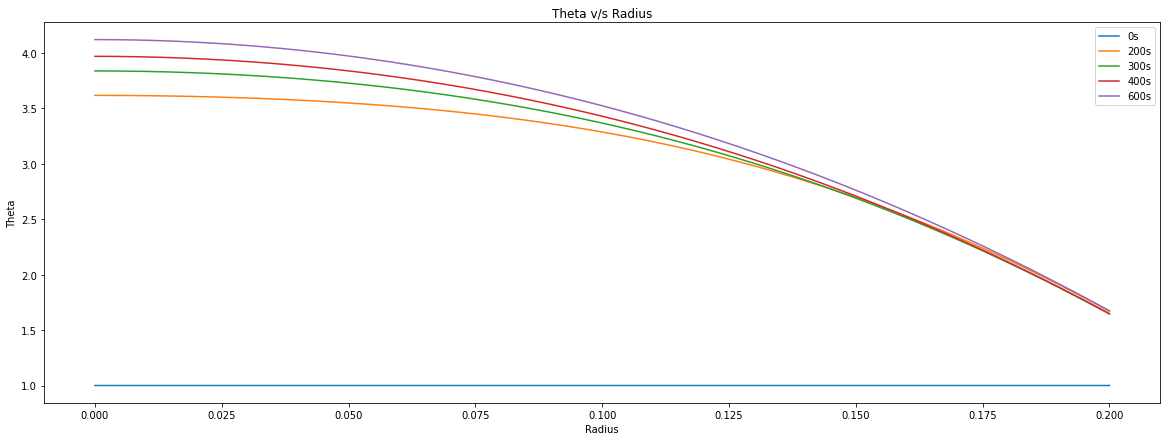

In [ ]:
plt.figure(figsize=(20,7))
plt.title("Theta v/s Time")
plt.plot(time[:50],theta3[0,:50])
#plt.xlim(0,12)
plt.xlabel("Time")
plt.ylabel("Theta")
print("BIOT NUMBER:", bi)


plt.figure(figsize=(20,7))
plt.title("Theta v/s Radius")
plt.plot(radius,theta3[:,0],label='0s')
plt.plot(radius,theta3[:,20],label='200s')
plt.plot(radius,theta3[:,30],label='300s')
plt.plot(radius,theta3[:,40],label='400s')
plt.plot(radius,theta3[:,60],label='600s')
plt.xlabel("Radius")
plt.ylabel("Theta")
plt.legend()

In [ ]:
#ax = fig.add_subplot(111)
#fig.subplots_adjust(bottom=0.2, top=0.75)

In [ ]:
#https://stackoverflow.com/questions/36513312/polar-heatmaps-in-python

#azm = np.linspace(0, 2 * np.pi, 91)

#r, angle = np.meshgrid(radius, azm)
###z = (r ** 2.0) / 4.0
#z=theta

#plt.subplot(projection="polar")

#plt.pcolormesh(angle, r, z)
#plt.pcolormesh(th, z, r)

#plt.plot(azm, r, color='k', ls='none') 
#plt.grid()

#plt.show()